In [1]:
#pip install ypstruct

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math as m
#from ypstruct import struct

In [3]:
''' Esta classe permite armazenar uma quantidade arbitrária de variáveis 
    como atributos, semelhante ao tipo struct do matlab 
    Também existe a classe ypstruct do pacote struct, mas a class a baixo se mostra
        muito rápida na iteração entre os vetores'''
class structtype():
    pass

In [4]:
img = cv2.imread('figs/lena.png',cv2.IMREAD_GRAYSCALE)

In [5]:
def convertVarFeat(img):
    data = structtype()
    data.img = np.array(img)
    data.imgSize = structtype()
    data.imgSize.lin, data.imgSize.col = data.img.shape
    
    return data

In [6]:
def filterMedian(dados):
    dt = dados.img

    size = structtype()
    size.dt = structtype()
    size.dt.lin, size.dt.col = dt.shape

    dados.kernel = np.ones((dados.kernelSize, dados.kernelSize))
    central = m.floor((dados.kernelSize / 2))
    C = np.zeros((size.dt.lin + central * 2, size.dt.col + central * 2))
    C[(0 + central):(size.dt.lin + central), (0 + central):(size.dt.col + central)] = dt
    
    buffer = np.zeros((dados.kernelSize * dados.kernelSize))
    D = np.zeros(dt.shape)
    
    for j in range((0), size.dt.lin):
        for k in range((0), size.dt.col):
            # Run kernel in one matrix's elements
            for kl in range(0, dados.kernelSize):
                for kk in range(0, dados.kernelSize):
                    buffer[(dados.kernelSize * kl + kk)] = (C[j + kl, k + kk])
            buffer = np.sort(buffer)
            value = buffer[int(np.floor((dados.kernelSize**2)/2))]
            D[j, k] = value
    D = np.uint8(D)

    return D

In [7]:
dados = convertVarFeat(img)

# Parâmetros para o Filtro da média
# Kernel def:
dados.kernelSize = 3

# Número de aplicações do filtro
numAp = 1;

# Variável auxiliar para guardar a saída
U = np.zeros((numAp, dados.imgSize.lin, dados.imgSize.col))

In [8]:
for k in range(0, numAp):
    if k == 0:
        U[k,:,:] = filterMedian(dados)
        #print(U[k,:,:])
    else:
        dados.img = U[k-1,:,:]
        U[k,:,:] = filterMedian(dados)
        #print(U[k,:,:])

Text(0.5, 1.0, 'Filtro da Mediana k=3x3:1x')

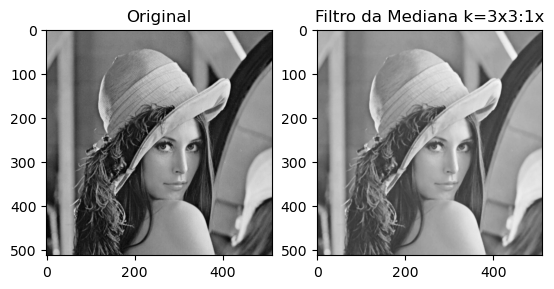

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img, 'gray')
ax.set_title('Original')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(U[(numAp - 1),:,:], 'gray')
ax.set_title(f'Filtro da Mediana k={dados.kernelSize}x{dados.kernelSize}:{numAp}x')

In [10]:
sImg1 = np.array(U[(numAp - 1),:,:])
cv2.imwrite(f"output/median_output_kernel_{dados.kernelSize}_aplicado_{numAp}x.png", sImg1)

True

In [11]:
imagens = list()
kernels = list()
for i in range(3,19,2):
    dados.kernelSize = i
    kernels.append(dados.kernelSize)
    U = np.zeros((numAp, dados.imgSize.lin, dados.imgSize.col))
    for k in range(0, numAp):
        if k == 0:
            U[k,:,:] = filterMedian(dados)
        else:
            dados.img = U[k-1,:,:]
            U[k,:,:] = filterMedian(dados)
    imagens.append(U[(numAp - 1),:,:])

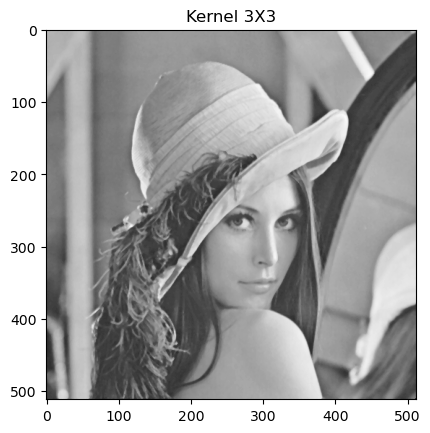

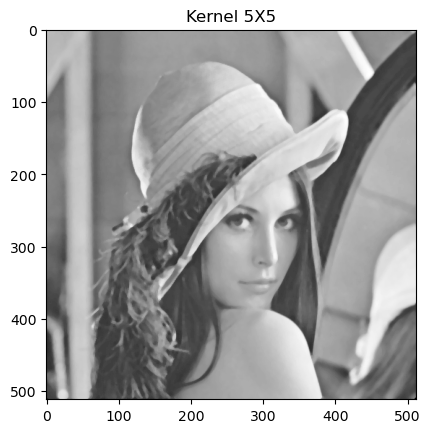

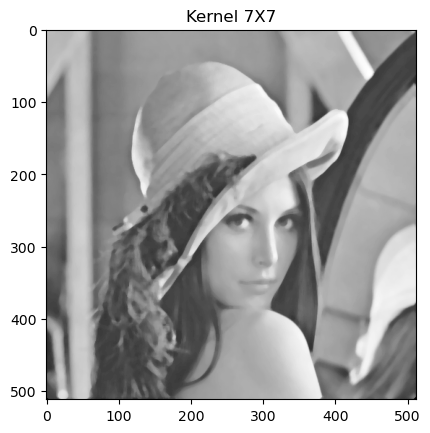

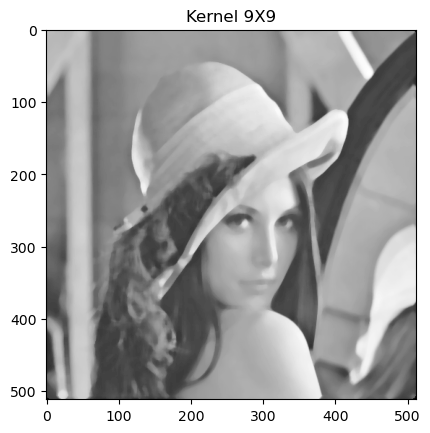

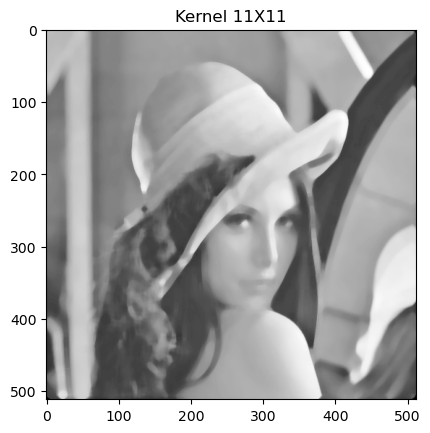

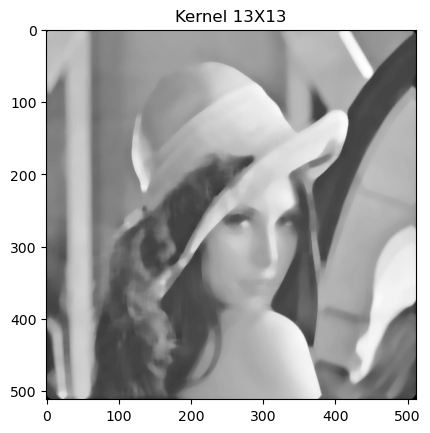

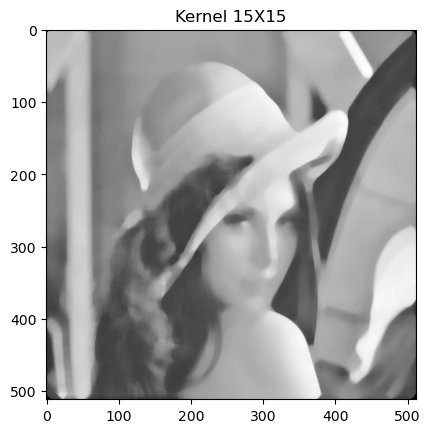

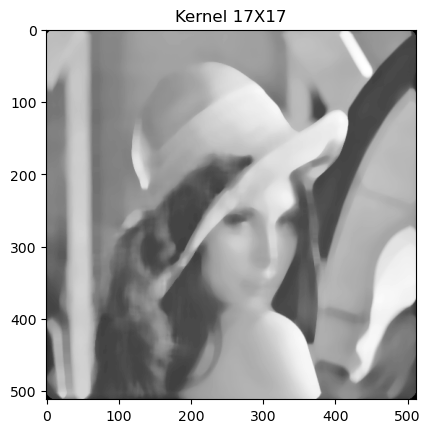

In [12]:
for i in range(len(imagens)):
    plt.figure()
    plt.imshow(imagens[i], 'gray')
    plt.title(f"Kernel {kernels[i]}X{kernels[i]}")
    plt.show()
    
    sImgX = np.array(imagens[i])
    cv2.imwrite(f"output/median_output_kernel_{kernels[i]}x{kernels[i]}_aplicado_{numAp}x.png", sImgX)

In [13]:
kernelMean = np.ones((3,3))
print("Kernel para filtro da média:")
print(kernelMean)

kernelMedian = np.ones((3,3))
print("Kernel para filtro da mediana:")
print(kernelMedian)

Kernel para filtro da média:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
Kernel para filtro da mediana:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [14]:
vizPixel = np.array([[150, 13, 200],[20, 27, 39],[50, 80, 90]])
print("Vizinhança ao redor do pixel de valor 27")
print(vizPixel)

Vizinhança ao redor do pixel de valor 27
[[150  13 200]
 [ 20  27  39]
 [ 50  80  90]]


In [15]:
print("Valor do novo pixel submetido ao filtro da média:")
print(int(np.sum((vizPixel*kernelMean))/9))

print("Valor do novo pixel submetido ao filtro da mediana:")
buffer = np.sort(np.ravel(vizPixel*kernelMean))
int(buffer[int(np.floor(9/2))])

Valor do novo pixel submetido ao filtro da média:
74
Valor do novo pixel submetido ao filtro da mediana:


50

In [16]:
img2 = cv2.imread('figs/ckt_board_saltpep_prob_pt05.tif',cv2.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'Filtro da Mediana k=3x3:5x')

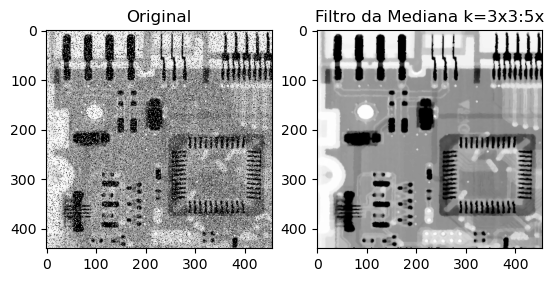

In [17]:
dados = convertVarFeat(img2)
dados.kernelSize = 3
numAp = 5;
U = np.zeros((numAp, dados.imgSize.lin, dados.imgSize.col))

for k in range(0, numAp):
    if k == 0:
        U[k,:,:] = filterMedian(dados)
    else:
        dados.img = U[k-1,:,:]
        U[k,:,:] = filterMedian(dados)
        
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img2, 'gray')
ax.set_title('Original')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(U[(numAp - 1),:,:], 'gray')
ax.set_title(f'Filtro da Mediana k={dados.kernelSize}x{dados.kernelSize}:{numAp}x')

In [18]:
sImg2 = np.array(U[(numAp - 1),:,:])
cv2.imwrite(f"output/median_output_kernel_{dados.kernelSize}x{dados.kernelSize}_aplicado_{numAp}x.png", sImg2)
cv2.imwrite(f"output/original3.png", img2)

True

In [19]:
img3 = cv2.imread('figs/test_pattern_blurring_orig.tif',cv2.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'Filtro da Mediana k=3x3:50x')

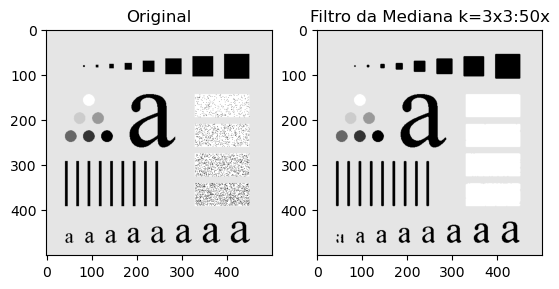

In [20]:
dados = convertVarFeat(img3)
dados.kernelSize = 3
numAp = 50;
U = np.zeros((numAp, dados.imgSize.lin, dados.imgSize.col))

for k in range(0, numAp):
    if k == 0:
        U[k,:,:] = filterMedian(dados)
    else:
        dados.img = U[k-1,:,:]
        U[k,:,:] = filterMedian(dados)
        
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img3, 'gray')
ax.set_title('Original')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(U[(numAp - 1),:,:], 'gray')
ax.set_title(f'Filtro da Mediana k={dados.kernelSize}x{dados.kernelSize}:{numAp}x')

In [21]:
sImg3 = np.array(U[(numAp - 1),:,:])
cv2.imwrite(f"output/media_output_kernel_{dados.kernelSize}x{dados.kernelSize}_aplicado_{numAp}x.png", sImg3)

True

Text(0.5, 1.0, 'Filtro da Mediana k=3x3:50x')

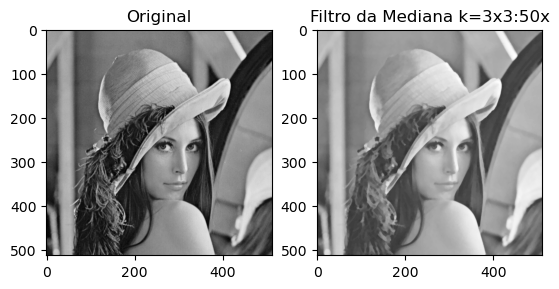

In [22]:
dados = convertVarFeat(img)
dados.kernelSize = 3
numAp = 50;
U = np.zeros((numAp, dados.imgSize.lin, dados.imgSize.col))

for k in range(0, numAp):
    if k == 0:
        U[k,:,:] = filterMedian(dados)
    else:
        dados.img = U[k-1,:,:]
        U[k,:,:] = filterMedian(dados)
        
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img, 'gray')
ax.set_title('Original')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(U[(numAp - 1),:,:], 'gray')
ax.set_title(f'Filtro da Mediana k={dados.kernelSize}x{dados.kernelSize}:{numAp}x')

In [23]:
sImg4 = np.array(U[(numAp - 1),:,:])
cv2.imwrite(f"output/median_output_kernel_{dados.kernelSize}x{dados.kernelSize}_aplicado_{numAp}x-lena.png", sImg4)

True